# Kannada MNIST classification using machine learning!

In [43]:
# Importing all the required lib

#Main classifier lib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt # All these other libs are for doing the functions
import numpy as np
import os
import pandas as pd

In [44]:
#assigning a variable for the os directory
dir = './Kannada_MNIST_datataset_paper\Kannada_MNIST_npz\Kannada_MNIST'

#assigning all testing and training values
x_train = np.load( os.path.join(dir,'X_kannada_MNIST_train.npz'))['arr_0']
x_test  = np.load( os.path.join(dir,'X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load( os.path.join(dir,'y_kannada_MNIST_train.npz'))['arr_0']
y_test  = np.load( os.path.join(dir,'y_kannada_MNIST_test.npz'))['arr_0']

#printing shapes of the basic arrays
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


9


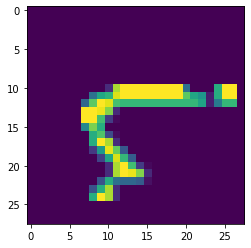

In [45]:
#just plotting some images
plt.imshow(x_train[1789]);
print(y_train[1789])

In [46]:
##reshaping this stuff for more detailed analysis
X_train = pd.DataFrame( x_train.reshape(x_train.shape[0],784))
X_test  = pd.DataFrame( x_test.reshape(x_test.shape[0],784))
Y_train = pd.DataFrame( y_train)
Y_test  = pd.DataFrame( y_test)

In [47]:
##normalizing the data
X_train_norm = X_train.astype('float32')/255.0
X_test_norm  = X_test.astype('float32')/255.0

In [48]:
# Very simple stuff, creating a single layer neural network using keras
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
#using Adam optimizer
model.compile(optimizer = 'SGD',loss = 'mean_squared_error',metrics = ['accuracy'])

In [49]:
#Training the model
model.fit(X_train_norm,Y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 20.7553 - accuracy: 0.0845A: 1s - loss: 
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.5375 - accuracy: 0.0814
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.5226 - accuracy: 0.0810
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.5163 - accuracy: 0.0809
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 20.5128 - accuracy: 0.0807


In [50]:
# TEsting the model using test data
model.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 20.5259 - accuracy: 0.0985


[20.52593994140625, 0.09849999845027924]

DAmn!! This is bad accuracy, Should try another method now

## Tweaking the circuit and testing again

In [51]:
#same model as earlier, I just changed the loss function
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
#using the same model but a little bit different model for evaluation
model1.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [52]:
#training the model
model1.fit(X_train_norm,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.9324: 1s - l
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1374 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1163 - accuracy: 0.9680: 0s - loss: 0.1162 - accuracy: 0.96
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1057 - accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0988 - accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0945 - accuracy: 0.9728
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0907 - accuracy: 0.9736
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0881 - accuracy: 0.9743
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0856 - accuracy: 0.9748
Epoch 10/10
1875/1875 [===============

In [38]:
model1.evaluate(X_test_norm,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3157 - accuracy: 0.9137


[0.31570807099342346, 0.9136999845504761]

OOh Damn boi! from 0.8% to 91% Accuracy! Learnt a Good lesson!!